In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Optional
import warnings
warnings.filterwarnings("ignore")

In [29]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
file_path = "medical_insurance.csv"
#loading the dataset
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "imtkaggleteam/health-insurance-dataset",
  file_path,
)

# Previewing the dataset to confirm load
print("First 5 records:")
print(df.head())

/tmp/ipython-input-29-3840687752.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:
   age  gender   bmi  children discount_eligibility     region  expenses  \
0   19  female  27.9         0                  yes  southwest  16884.92   
1   18    male  33.8         1                   no  southeast   1725.55   
2   28    male  33.0         3                   no  southeast   4449.46   
3   33    male  22.7         0                   no  northwest  21984.47   
4   32    male  28.9         0                   no  northwest   3866.86   

    premium  
0  168.8492  
1   17.2555  
2   44.4946  
3  439.6894  
4   77.3372  


In [12]:
print("Shape:", df.shape) #rows,columns

Shape: (1338, 8)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [ ]:
df.describe()

,age,bmi,children,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,262.874685
std,14.049960,6.098382,1.205493,12110.011240,292.532178
min,18.000000,16.000000,0.000000,1121.870000,11.218700
25%,27.000000,26.300000,0.000000,4740.287500,87.354250
50%,39.000000,30.400000,1.000000,9382.030000,174.997400
75%,51.000000,34.700000,2.000000,16639.915000,342.908900
max,64.000000,53.100000,5.000000,63770.430000,1983.106400


In [ ]:
print("Missing values:\n", df.isnull().sum()) #there are no missing values therefore EDA can be directly done


Missing values:
 age                     0
gender                  0
bmi                     0
children                0
discount_eligibility    0
region                  0
expenses                0
premium                 0
dtype: int64


In [ ]:
df.drop_duplicates(inplace=True)  #duplicate rows are removed

In [ ]:
#I will use these columns or values for visualisations and to encode the categorical data .
for col in df.select_dtypes(include='object').columns:
    print(f"{col} unique values: {df[col].unique()}")

gender unique values: ['female' 'male']
discount_eligibility unique values: ['yes' 'no']
region unique values: ['southwest' 'southeast' 'northwest' 'northeast']


Countplots used to understand the distributions in each column,understand the imbalances and comapre the groups with each other.

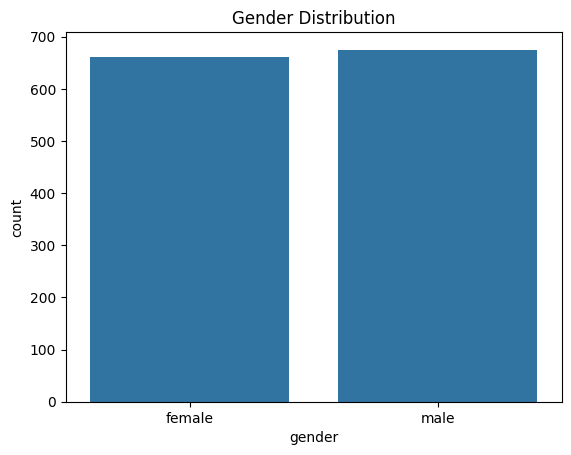

In [ ]:
#gender visualisations
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

Fair distribution of gender therefore no gender bias.

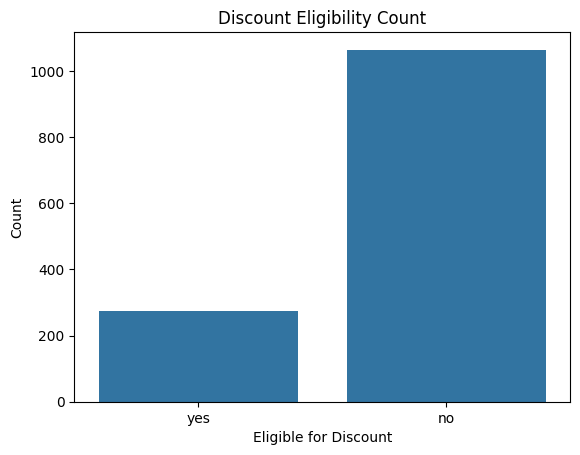

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='discount_eligibility', data=df)
plt.title('Discount Eligibility Count')
plt.xlabel('Eligible for Discount')
plt.ylabel('Count')
plt.show()

Most people aren't eligible for a discount therefore discount can be affected.


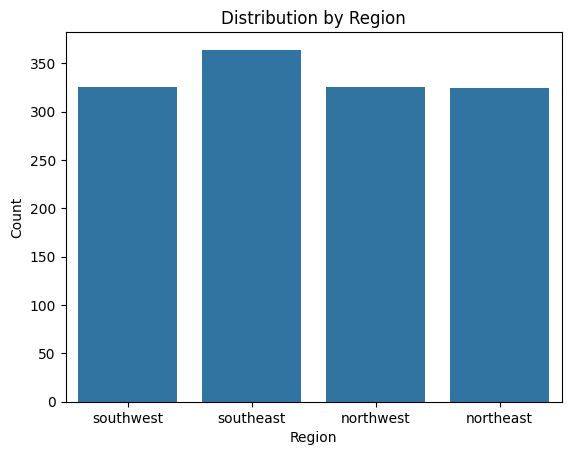

In [ ]:
sns.countplot(x='region', data=df)
plt.title('Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

Barplots are made to check any outliers and histograms made to understand the distributions.

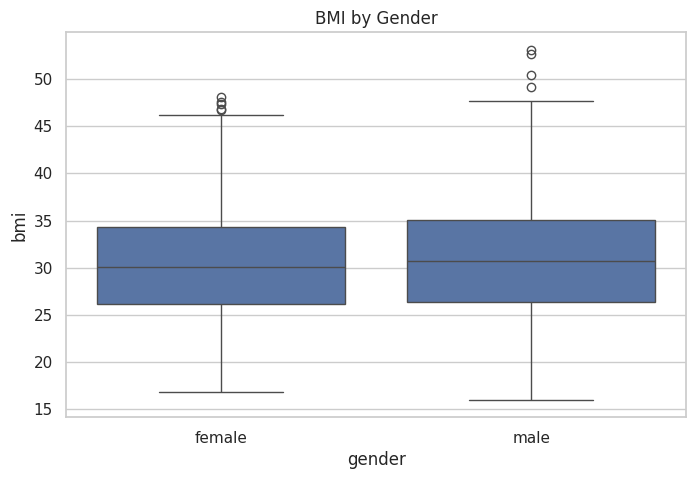

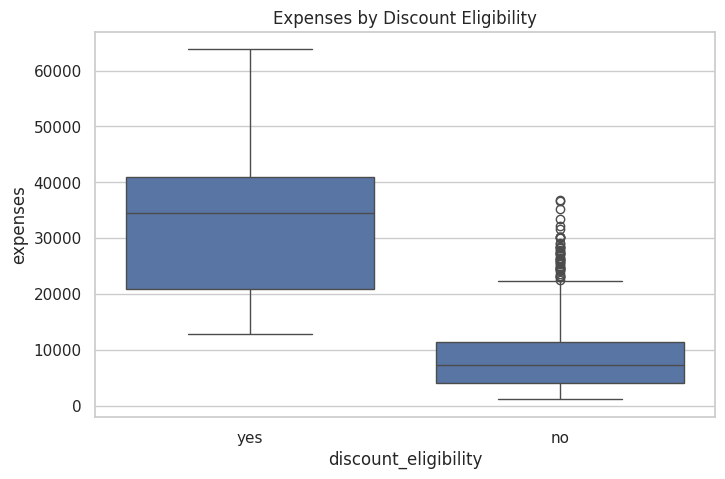

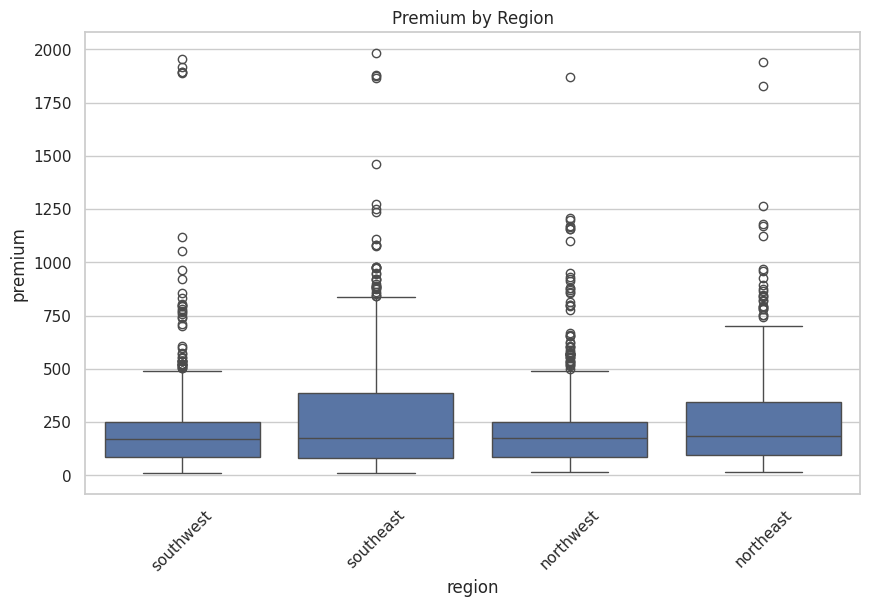

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#BMI vs Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('BMI by Gender')
plt.show()

#Expenses vs Discount Eligibility
plt.figure(figsize=(8, 5))
sns.boxplot(x='discount_eligibility', y='expenses', data=df)
plt.title('Expenses by Discount Eligibility')
plt.show()

#Premium by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='premium', data=df)
plt.title('Premium by Region')
plt.xticks(rotation=45)
plt.show()


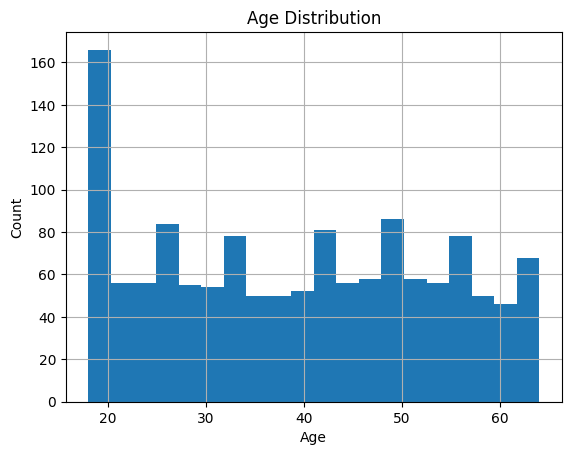

In [ ]:
# Age distribution
df['age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



Correlation Heatmaps are used to understand the relatioship between the different variables of the dataset.

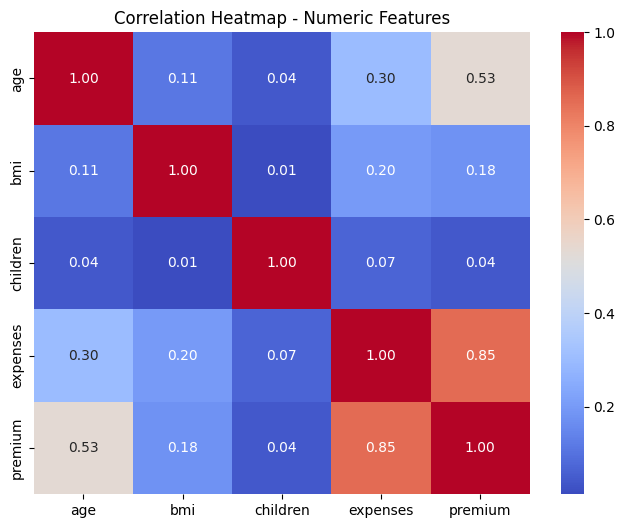

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Numeric Features")
plt.show()

Expenses and premium have a strong positive correlation and relationship therefore individuals with higher expenses tend to pay higher insurance premiums.

Age and premium have a moderate correlation meaning older indiviuals might be paying more for insurance due to health risks.

Surprisingly, bmi does not have a strong correlation with premium and expenses while it should have influenced both the variables.

Week 2

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt   #visualisation
import seaborn as sns

#libraries for building , training and evaluating models
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [3]:
df.isna().sum()


,0
age,0
gender,0
bmi,0
children,0
discount_eligibility,0
region,0
expenses,0
premium,0


There are no missing columns therefore imputation is not required.

In [30]:
#label encoding gender and discount_eligibility
label_cols = ['gender', 'discount_eligibility']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # saving encoders for later need.

#One-Hot Encode 'region'
region_ohe = pd.get_dummies(df['region'], prefix='region', drop_first=True)

# Concatenate the new region columns and drop the original columns
df = pd.concat([df.drop('region', axis=1), region_ohe], axis=1)

print(df.head())


   age  gender   bmi  children  discount_eligibility  expenses   premium  \
0   19       0  27.9         0                     1  16884.92  168.8492   
1   18       1  33.8         1                     0   1725.55   17.2555   
2   28       1  33.0         3                     0   4449.46   44.4946   
3   33       1  22.7         0                     0  21984.47  439.6894   
4   32       1  28.9         0                     0   3866.86   77.3372   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


Label encoding converts the gender and discount_eligibility into 0/1.
One-Hot Encoding converts the values of the region column into separate columns. As the values are more then 2 and do not have a logical order.

I will detect outliers in Expenses and premium as both of them will be predicted by my model in the future.
They will be needed as to not distort the Regression model while it is trained.

In [31]:
def detect_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

In [32]:
outliers_expenses = detect_iqr_outliers(df['expenses'])
outliers_premium = detect_iqr_outliers(df['premium'])

print(f"Number of outliers in 'expenses': {len(outliers_expenses)}")
print(f"Number of outliers in 'premium': {len(outliers_premium)}")

Number of outliers in 'expenses': 139
Number of outliers in 'premium': 113


Since the outliers are < 5% and >10% and the model to be used in future includes regression model which is sensitive to outliers,therefore we will cap the outlier values to the lower and upper bound preventing data loss and distortion of the model.

In [33]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

df['expenses_capped'] = cap_outliers(df['expenses'])
df['premium_capped'] = cap_outliers(df['premium'])

BMI has the most effect on health while we saw that it least affected the premium and expenses in the correlation heatmap ,therefore we are applying feature engineering to BMI.


In [34]:
df['bmi_category'] = pd.cut(df['bmi'],
                            bins=[0, 18.5, 25, 30, 100],
                            labels=['underweight', 'normal', 'overweight', 'obese'])
print(df.head())

   age  gender   bmi  children  discount_eligibility  expenses   premium  \
0   19       0  27.9         0                     1  16884.92  168.8492   
1   18       1  33.8         1                     0   1725.55   17.2555   
2   28       1  33.0         3                     0   4449.46   44.4946   
3   33       1  22.7         0                     0  21984.47  439.6894   
4   32       1  28.9         0                     0   3866.86   77.3372   

   region_northwest  region_southeast  region_southwest  expenses_capped  \
0             False             False              True         16884.92   
1             False              True             False          1725.55   
2             False              True             False          4449.46   
3              True             False             False         21984.47   
4              True             False             False          3866.86   

   premium_capped bmi_category  
0        168.8492   overweight  
1         17.2555   

In [35]:
print(df.head())

   age  gender   bmi  children  discount_eligibility  expenses   premium  \
0   19       0  27.9         0                     1  16884.92  168.8492   
1   18       1  33.8         1                     0   1725.55   17.2555   
2   28       1  33.0         3                     0   4449.46   44.4946   
3   33       1  22.7         0                     0  21984.47  439.6894   
4   32       1  28.9         0                     0   3866.86   77.3372   

   region_northwest  region_southeast  region_southwest  expenses_capped  \
0             False             False              True         16884.92   
1             False              True             False          1725.55   
2             False              True             False          4449.46   
3              True             False             False         21984.47   
4              True             False             False          3866.86   

   premium_capped bmi_category  
0        168.8492   overweight  
1         17.2555   

In [37]:
X = df.drop(['expenses', 'premium'], axis=1)
y_exp   = df['expenses_capped']
y_prem  = df['premium_capped']

X_train, X_test, y_exp_train, y_exp_test, y_prem_train, y_prem_test = train_test_split(
    X, y_exp, y_prem,
    test_size=0.2, random_state=42 #80%of data used in training and 20% in testing. Random state = to an integer therefore each time code runs the data remains the same not shuffled.
)